In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_curve, auc, precision_recall_fscore_support
)
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree

In [3]:
df=pd.read_csv("Dataset.csv")
df.head(5)

id                name  fixed acidity  citric acid  residual sugar  \
0   1          Chardonnay            7.4         0.00             1.9   
1   2  Cabernet Sauvignon            7.8         0.00             2.6   
2   3              Merlot            7.8         0.04             2.3   
3   4          Pinot Noir           11.2         0.56             1.9   
4   5           Zinfandel            7.4         0.00             1.9   

   chlorides  total sulfur dioxide  density  sulphates  alcohol   type  \
0      0.076                  34.0   0.9978       0.56      9.4   Port   
1      0.098                  67.0   0.9968       0.68      9.8  White   
2      0.092                  54.0   0.9970       0.65      9.8   Rose   
3      0.075                  60.0   0.9980       0.58      9.8  White   
4      0.076                  34.0   0.9978       0.56      9.4   Rose   

      Taste  quality  
0  Balanced        1  
1      Sour        0  
2    Earthy        0  
3    Bitter        1  
4  Balanced        1

In [4]:
df.dtypes

id                        int64
name                     object
fixed acidity           float64
citric acid             float64
residual sugar          float64
chlorides               float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
Taste                    object
quality                   int64
dtype: object

## Removing Irrelevant Columns

### Removing columns like "id" and "name" as they are not relevent to our analysis.

In [5]:
df=df.drop(['id','name'],axis=1)
df.head(5)

fixed acidity  citric acid  residual sugar  chlorides  \
0            7.4         0.00             1.9      0.076   
1            7.8         0.00             2.6      0.098   
2            7.8         0.04             2.3      0.092   
3           11.2         0.56             1.9      0.075   
4            7.4         0.00             1.9      0.076   

   total sulfur dioxide  density  sulphates  alcohol   type     Taste  quality  
0                  34.0   0.9978       0.56      9.4   Port  Balanced        1  
1                  67.0   0.9968       0.68      9.8  White      Sour        0  
2                  54.0   0.9970       0.65      9.8   Rose    Earthy        0  
3                  60.0   0.9980       0.58      9.8  White    Bitter        1  
4                  34.0   0.9978       0.56      9.4   Rose  Balanced        1

## Checking for any duplicate rows in the dataset and discarding them if any.

In [6]:
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (0, 11)


In [7]:
df.drop_duplicates(inplace=True)
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (0, 11)


## Checking for Null values in Dataset and Removing it


In [8]:
print(df.isnull().sum())

fixed acidity           1
citric acid             2
residual sugar          0
chlorides               1
total sulfur dioxide    4
density                 3
sulphates               0
alcohol                 0
type                    3
Taste                   5
quality                 0
dtype: int64


In [9]:
df = df.dropna()
print(df.isnull().sum())

fixed acidity           0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
Taste                   0
quality                 0
dtype: int64


<br>

## Plotting the Dataset

### Histogram is a data visualization technique that is used to visualize generally one variable

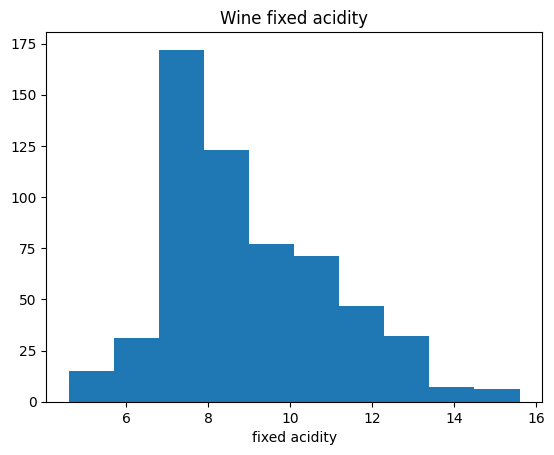

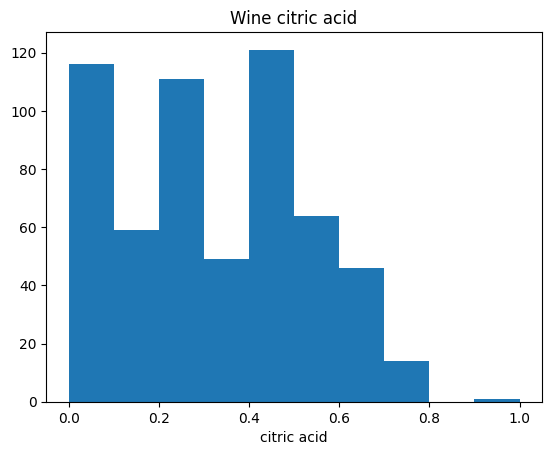

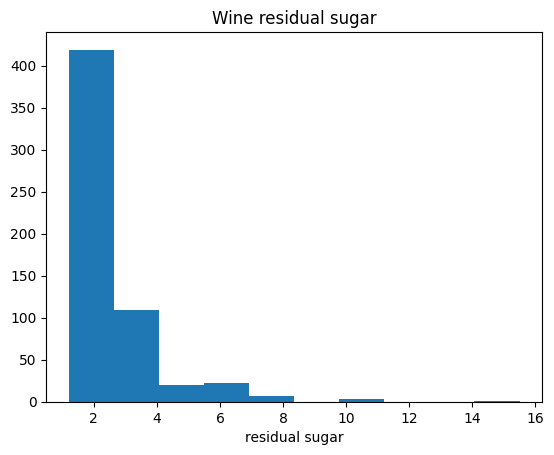

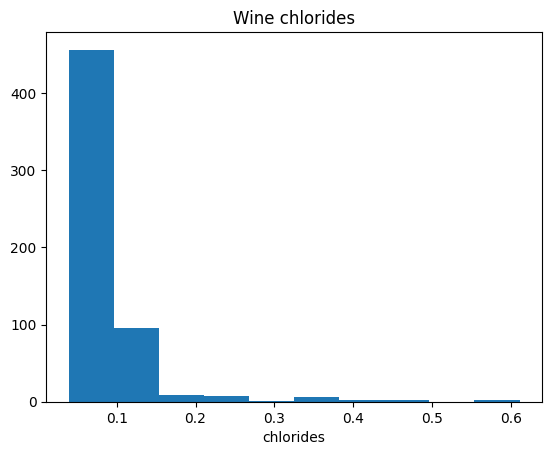

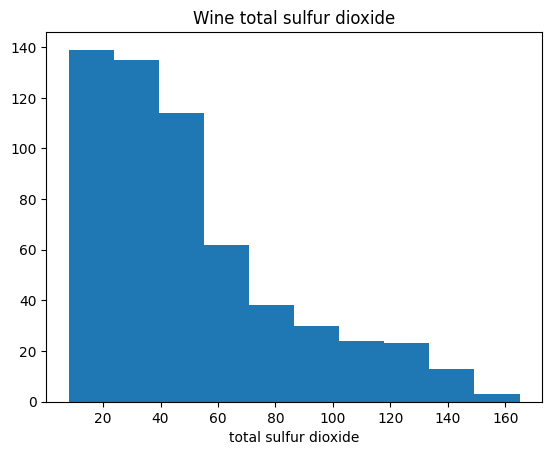

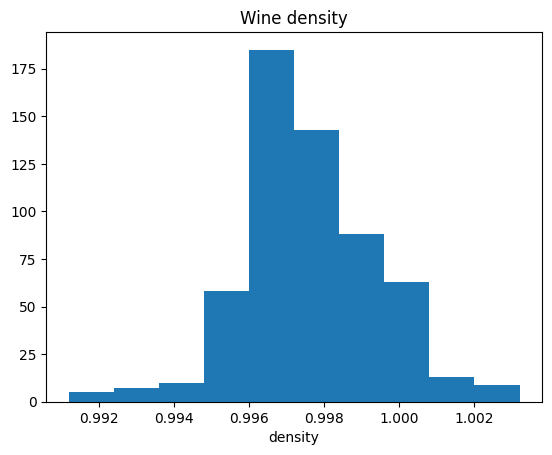

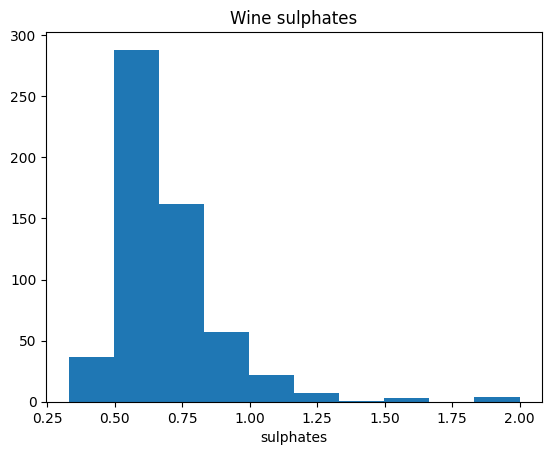

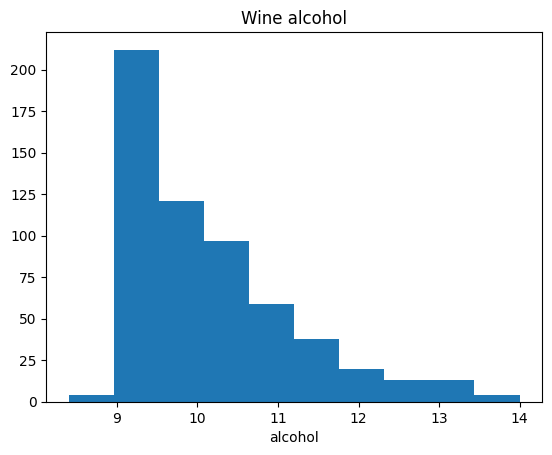

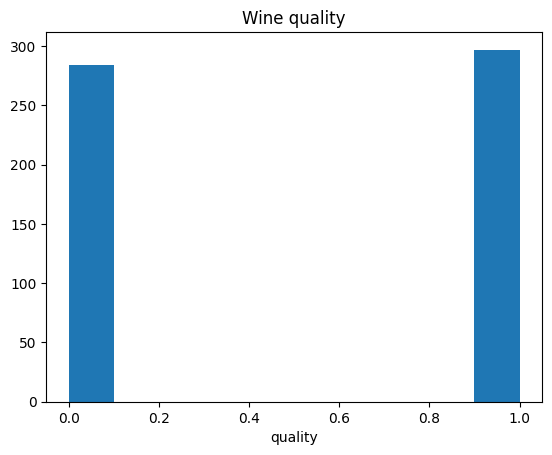

In [10]:
for i in df.columns:
    if df[i].dtype =='float64' or df[i].dtype =='int64':
        col = df[i]
        plt.xlabel(str(i))
        plt.title('Wine '+str(i))
        plt.hist(col)
        plt.show()



## Distribution of nominal variables using count plot
#### A count plot is similar to a histogram, but for categorical variables instead of quantitative ones. It's a type of "categorical plot" in Seaborn, which are used to compare different groups.

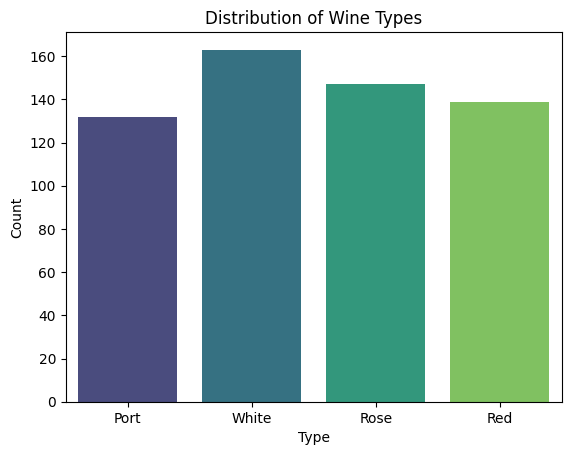

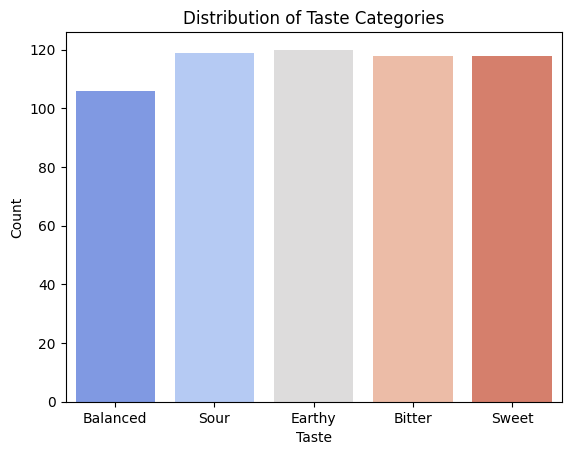

In [11]:
import warnings
warnings.filterwarnings('ignore')


# Plotting the distribution of the 'type' variable
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Wine Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

print()
# Plotting the distribution of the 'Taste' variable
sns.countplot(data=df, x='Taste', palette='coolwarm')
plt.title('Distribution of Taste Categories')
plt.xlabel('Taste')
plt.ylabel('Count')
plt.show()

### Heatmap
#### Heatmap is generally used to show the correlation of all the numeric variable to all the other numeric variables.

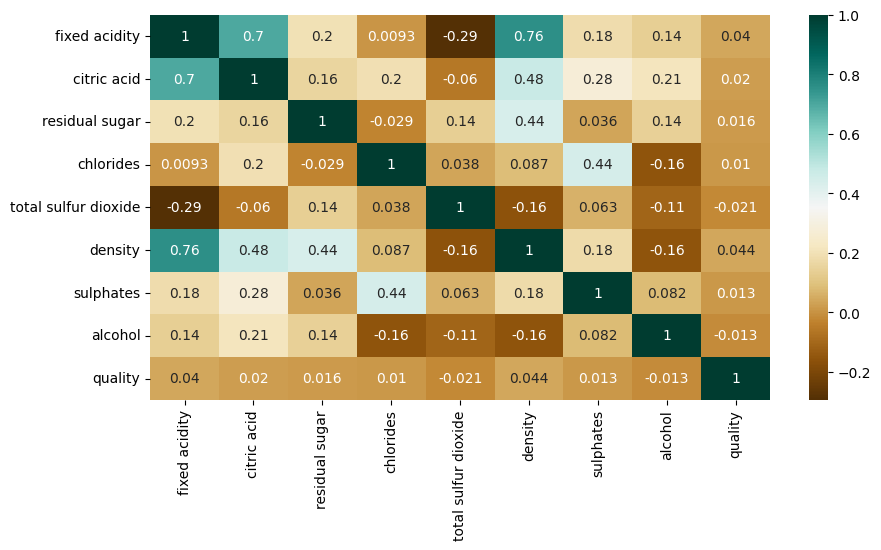

In [12]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

<br>

### Scatter Plot
#### Useful for visualizing the relationship between two continuous variables.


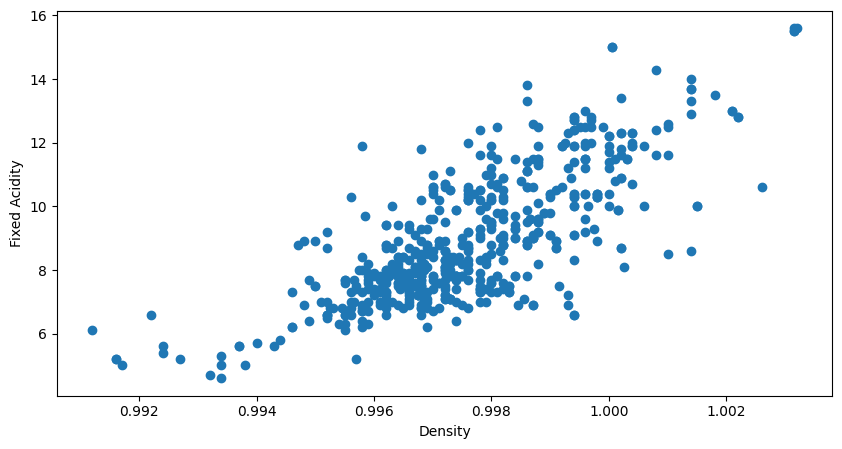

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['density'], df['fixed acidity'])
ax.set_xlabel('Density')
ax.set_ylabel('Fixed Acidity')
plt.show()

#### We can see a slight positive corelation between fixed acidity and density.

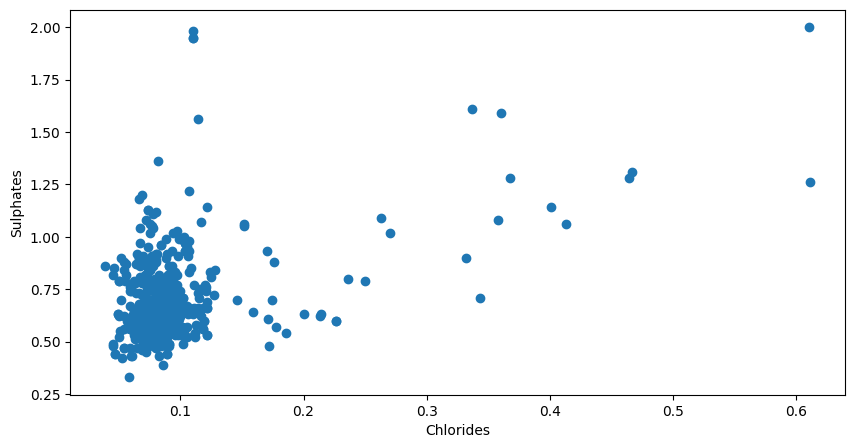

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['chlorides'], df['sulphates'])
ax.set_xlabel('Chlorides')
ax.set_ylabel('Sulphates')
plt.show()

#### There is no corelation between Sulphates and Chlorides.

## Voilin Plot
#### A violin plot uses density curves to show the distribution of numeric data. The width of each curve represents the approximate frequency of data points in each region.

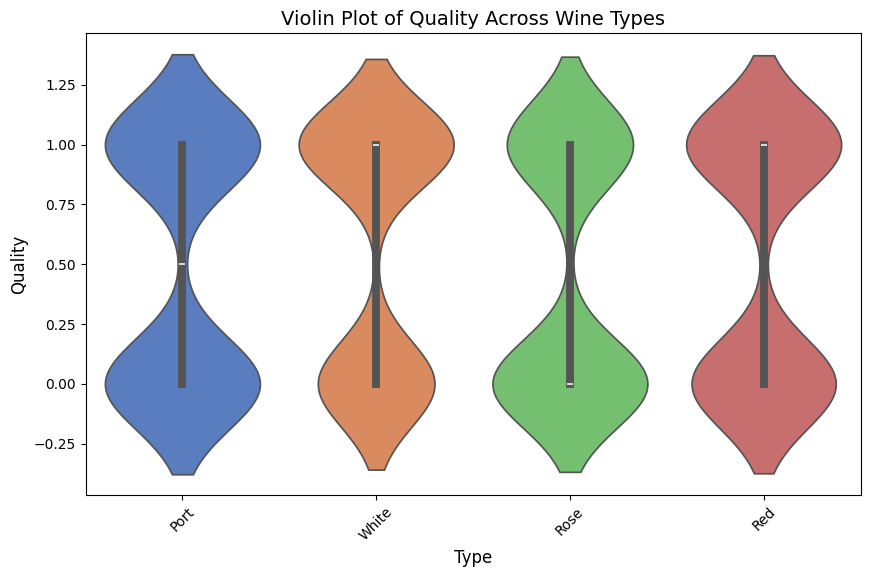

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='type', y='quality', palette='muted')
plt.title('Violin Plot of Quality Across Wine Types', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Quality', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### The violin plot shows that most wines, regardless of type (Port, White, Rose, Red), have quality scores clustered around 5–6. Rose wines exhibit the most consistent distribution, while White and Red wines show more variability. Extreme quality scores (low or high) are less frequent across all wine types.

## Swarm Plot
#### A swarm plot is a categorical scatter plot that uses dots to represent data points, arranged so that they don't overlap. The arrangement makes the plot look like a swarm of bees.

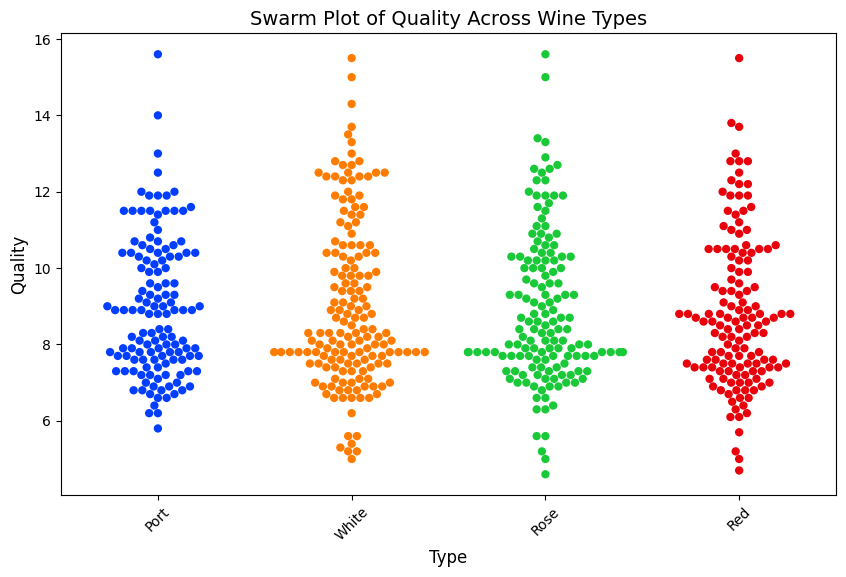

In [16]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='type', y='fixed acidity', palette='bright', size=6)
plt.title('Swarm Plot of Quality Across Wine Types', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Quality', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### The swarm plot shows the distribution of wine quality scores across types (Port, White, Rose, Red). Most wines cluster around mid-range scores (5–6) for all types. Outliers are visible at extreme scores, such as quality 3 or 8, indicating some variability. Rose wines appear more consistent, while others vary slightly more.

In [ ]:
# Label Encoding for all non-numeric columns
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric
        df[col] = label_encoder.fit_transform(df[col])

# Display the transformed dataframe
print("Updated Numeric DataFrame:")
print(df.head())

# Verify the data types
print("\nData Types after Encoding:")
print(df.dtypes)

## Spliting the dataset into Dependent and Independent Variables

In [20]:
df = df.rename(columns = {"quality" : "Target"})
df.head()
X = df.drop('Target', axis=1)
y = df["Target"]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(435, 10)
(146, 10)


### fit a normal decision tree without any fine tuning and check the results

In [22]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

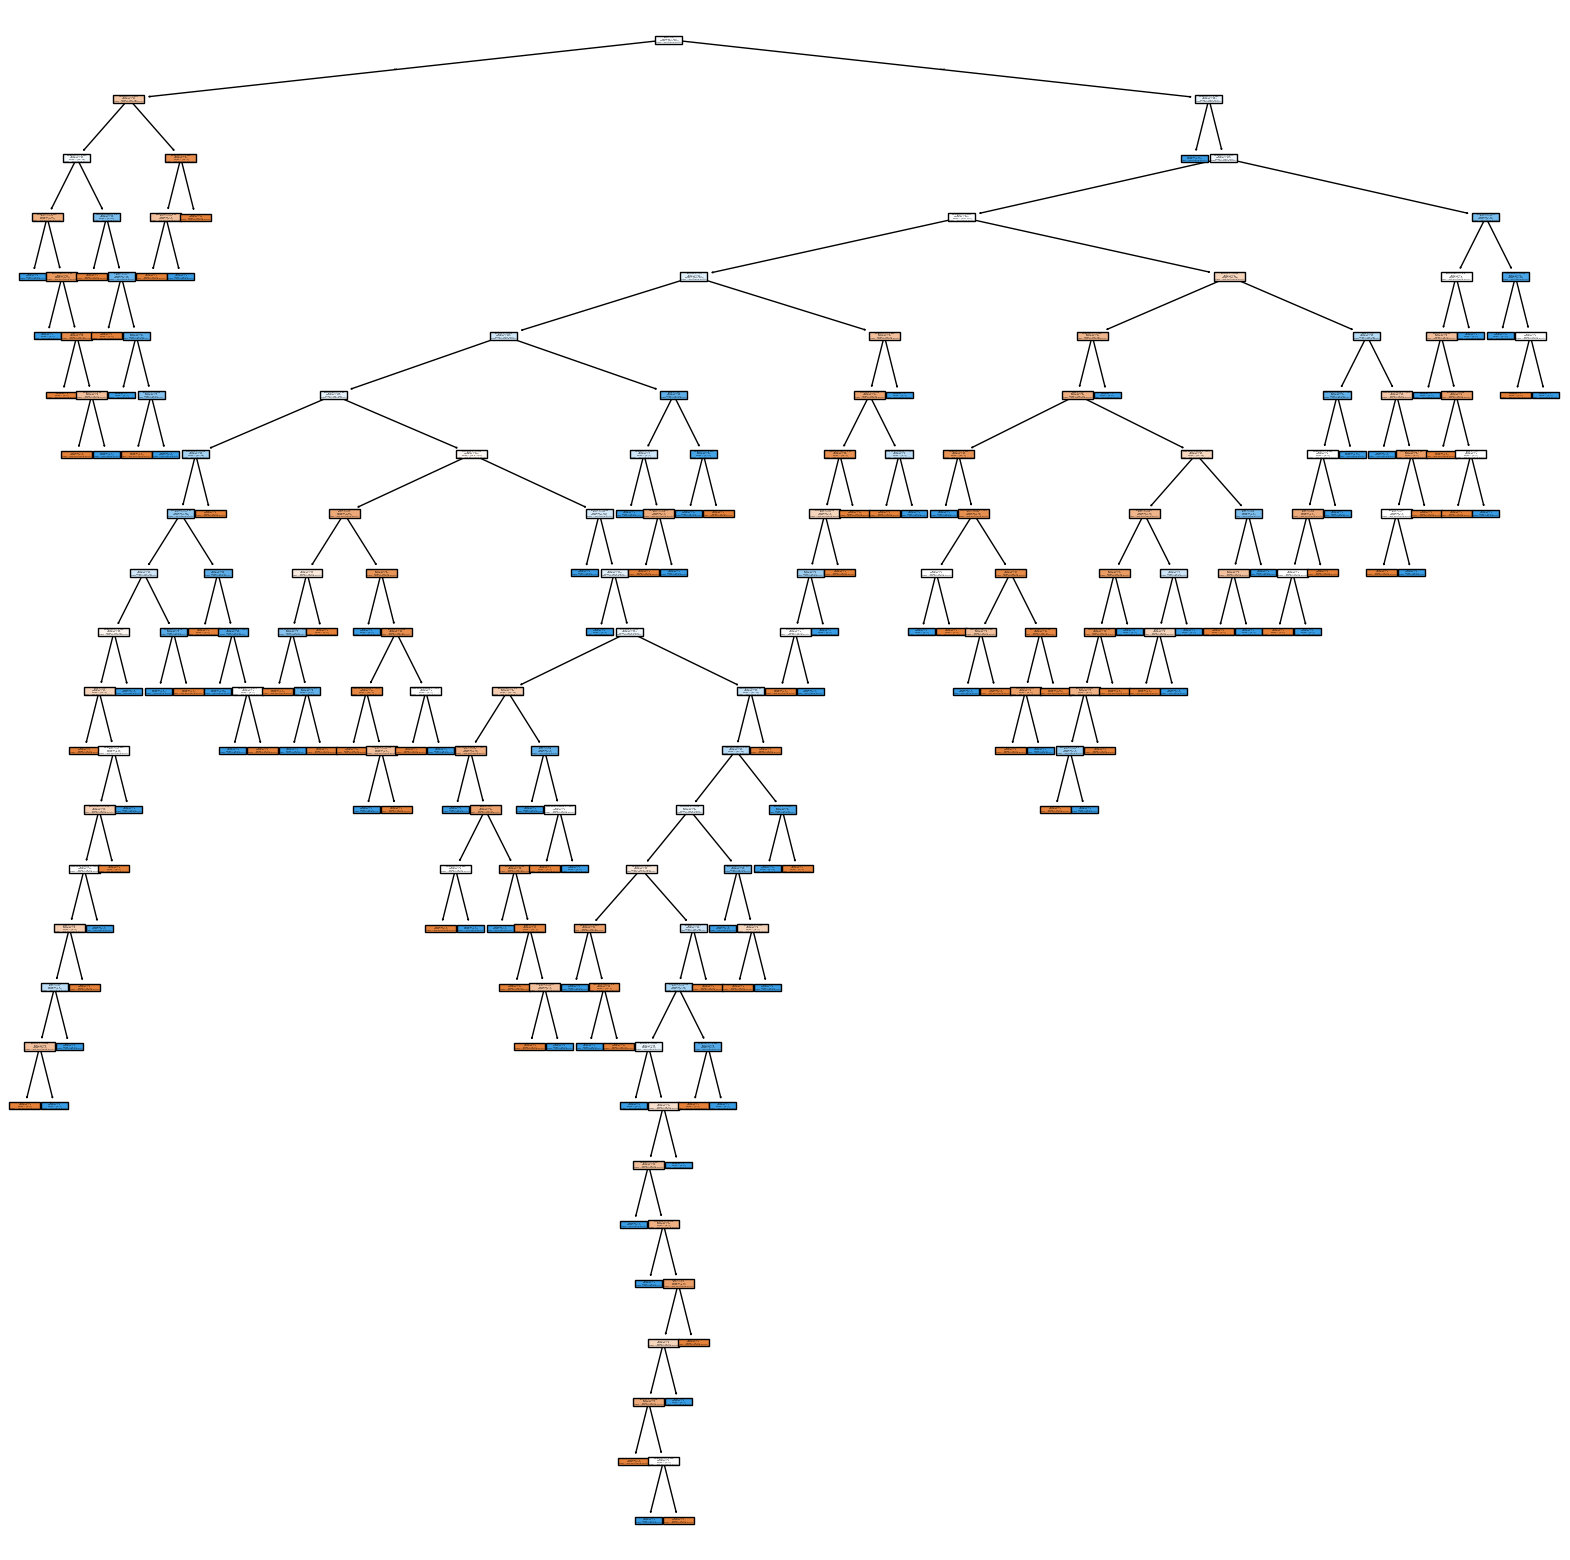

In [24]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not Good Wine Quality', 'Good Wine Quality']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [25]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Test score 0.5068493150684932
Train Confusion matrix


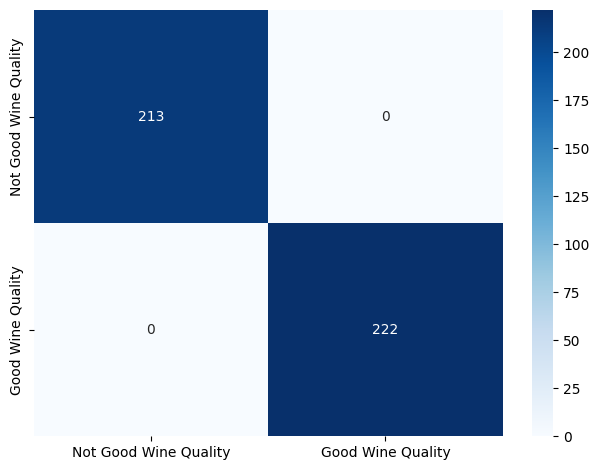

Test Confusion matrix


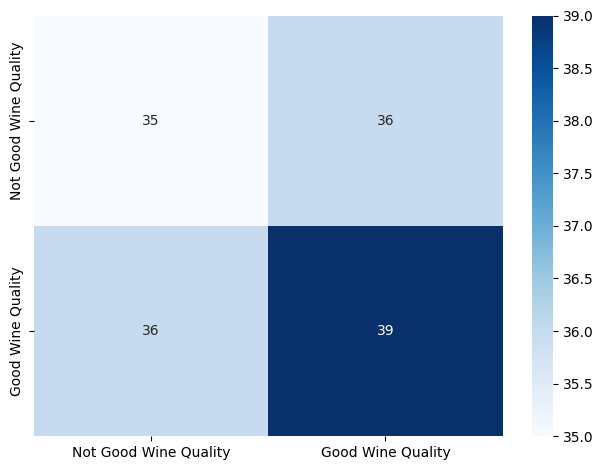

In [26]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

### We can see that in our train data we have 100% accuracy (100 % precison and recall). But in test data model is not well generalizing. We have just 50% accuracy. Over model is clearly overfitting. We will avoid overfitting through pruning. We will do cost complexity prunning

## Pre pruning techniques

In [27]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.896551724137931
Test score 0.5
Train Confusion matrix


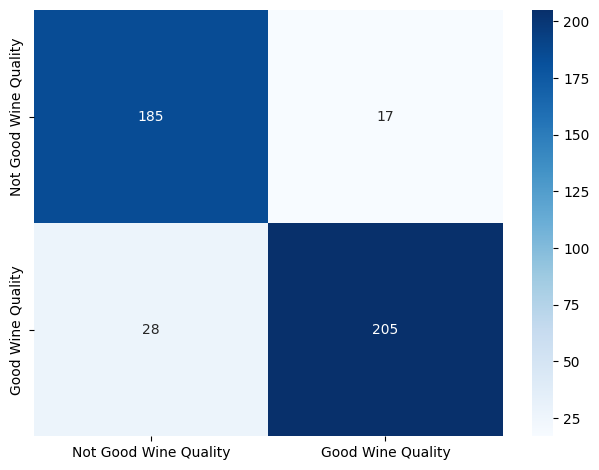

Test Confusion matrix


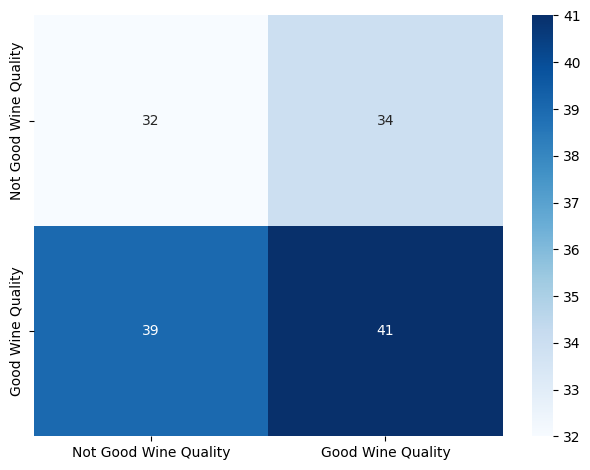

In [28]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

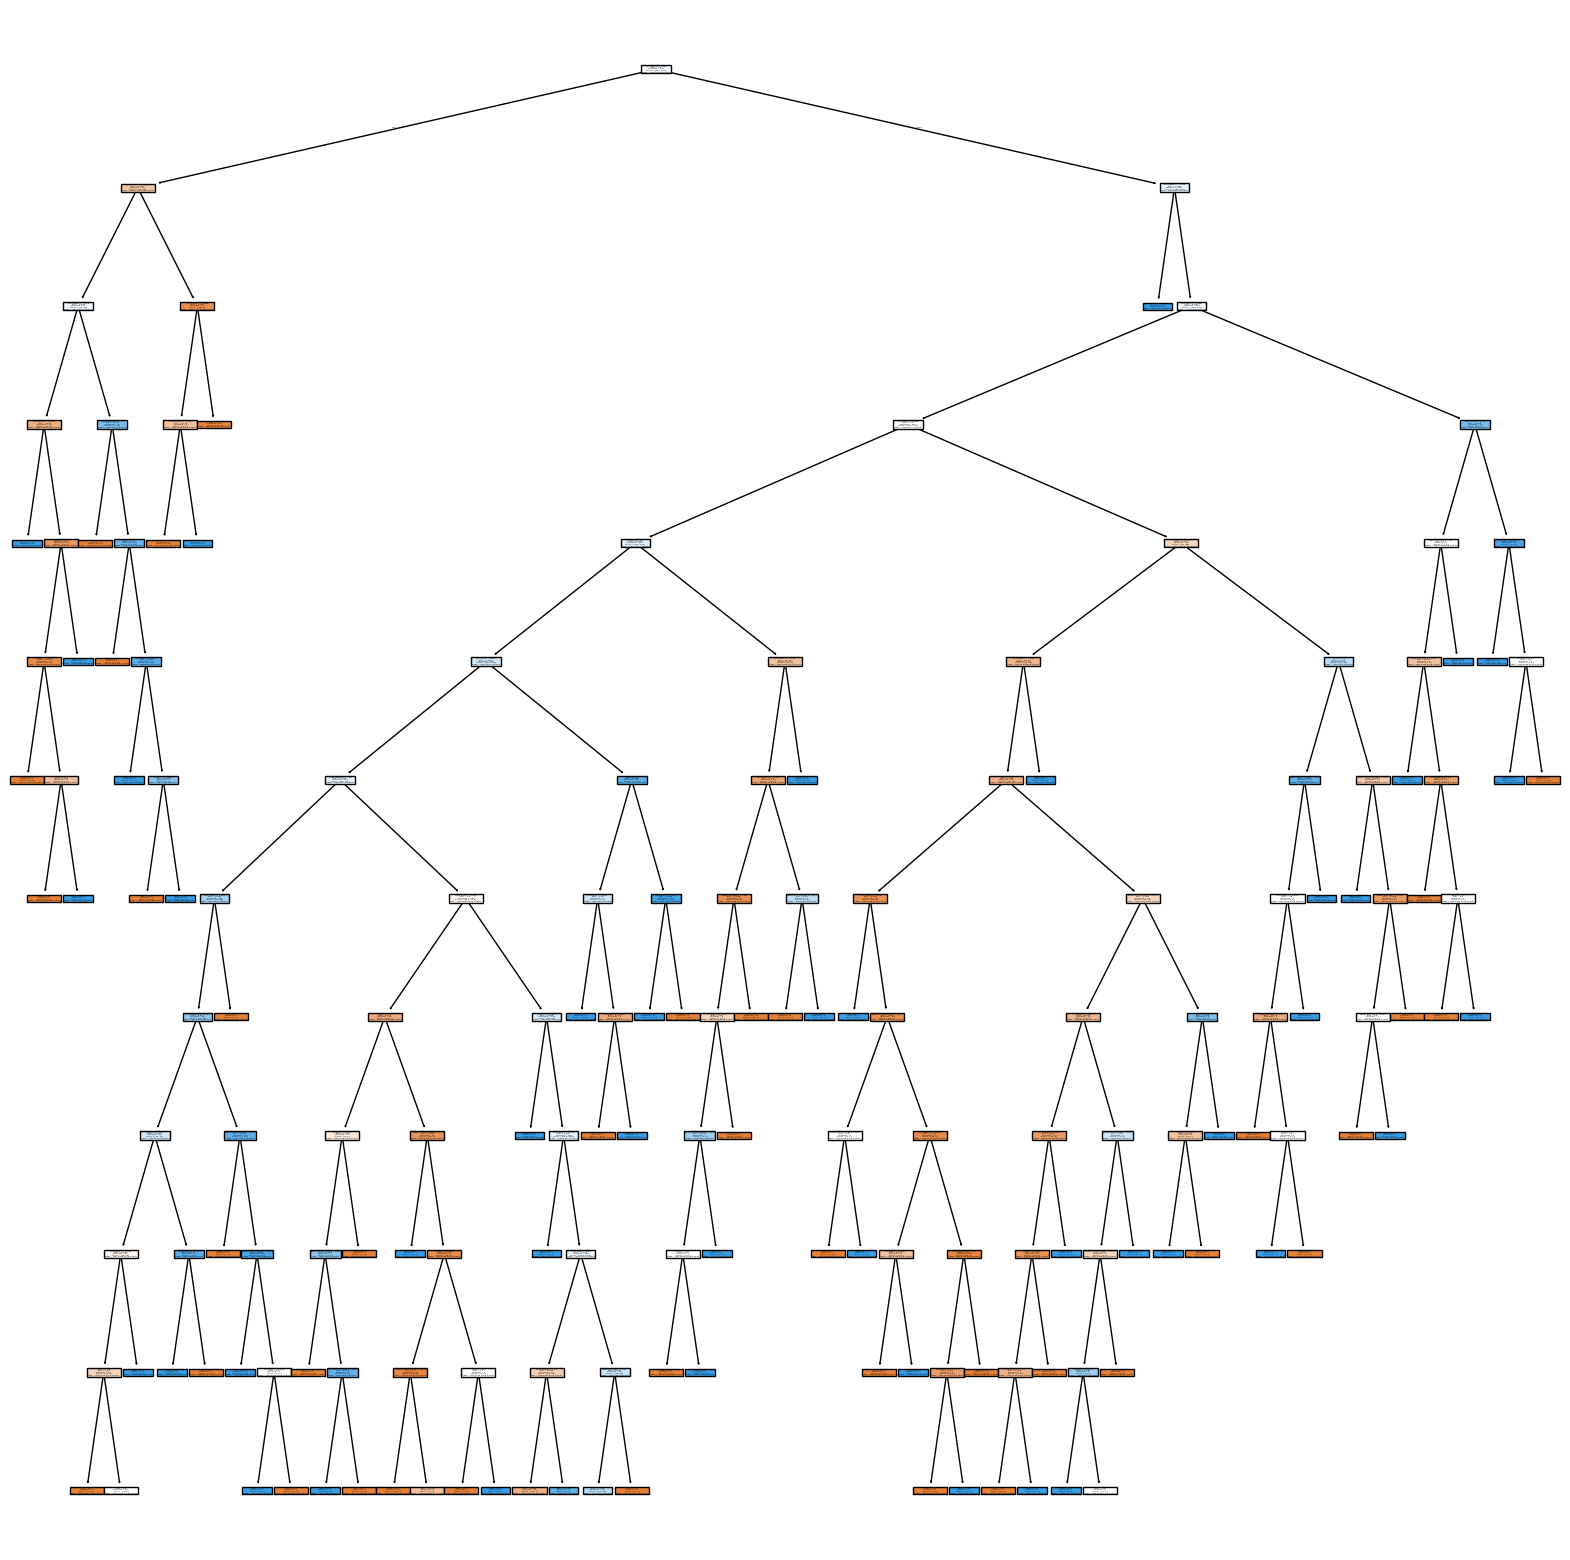

In [30]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not Good Wine Quality', 'Good Wine Quality']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

### We can see that tree is pruned and there is improvement in test accuracy.But still there is still scope of improvement.

 ## Post pruning techniques

In [31]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00153257 0.00153257 0.00172414 0.00172414 0.00183908
 0.00191571 0.00195402 0.00204342 0.00206104 0.00207991 0.00210728
 0.00212202 0.00216362 0.00240832 0.00245211 0.00245211 0.00245211
 0.00265645 0.00306513 0.00306513 0.00306513 0.00326948 0.00328407
 0.00344828 0.00344828 0.00344828 0.00344828 0.00350301 0.00356617
 0.00357247 0.00357307 0.00359258 0.00372879 0.00376176 0.00383142
 0.00384644 0.00394089 0.00397373 0.004      0.00402846 0.00407562
 0.00413793 0.0041979  0.00421456 0.00426929 0.00446247 0.00469224
 0.00490866 0.00501277 0.00504433 0.00526341 0.00530504 0.00531978
 0.00555952 0.005586   0.00570587 0.00586828 0.00725481 0.007678
 0.00799887 0.00831541 0.00923338]


In [32]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

### We will remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.

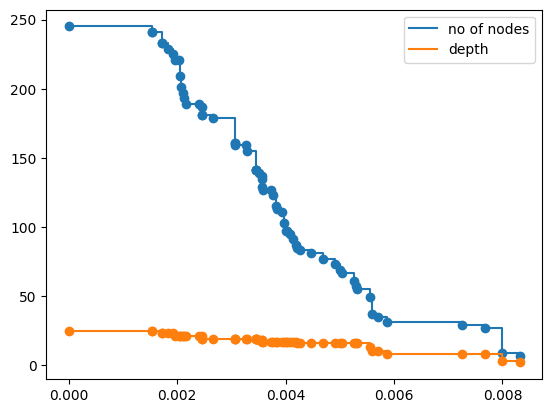

In [33]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

### Observation: As alpha increases no of nodes and depth decreases

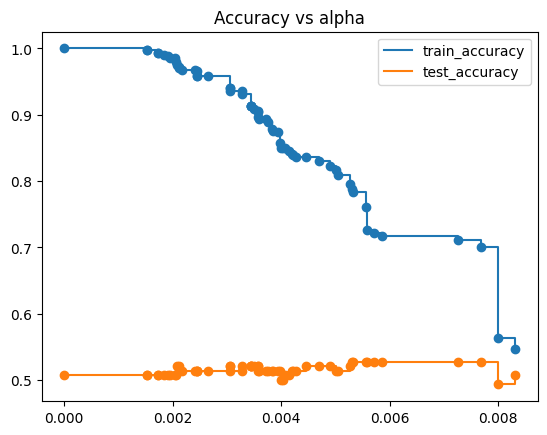

In [34]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

### We can choose alpha = 0.006

Train score 0.7172413793103448
Test score 0.5273972602739726
Train Confusion matrix


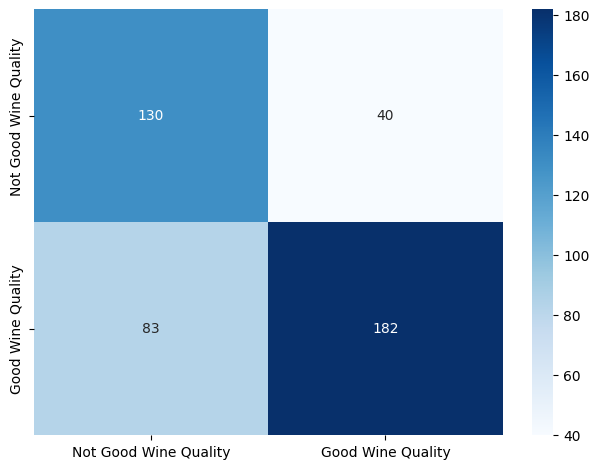

Test Confusion matrix


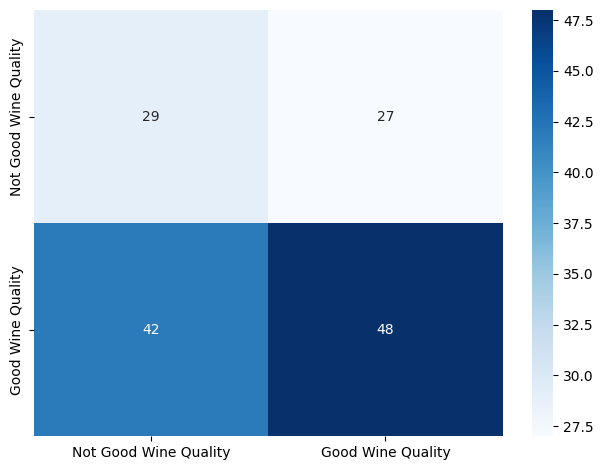

In [42]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.006)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

### We can see that now our model is not overfiting and performance on test data have improved

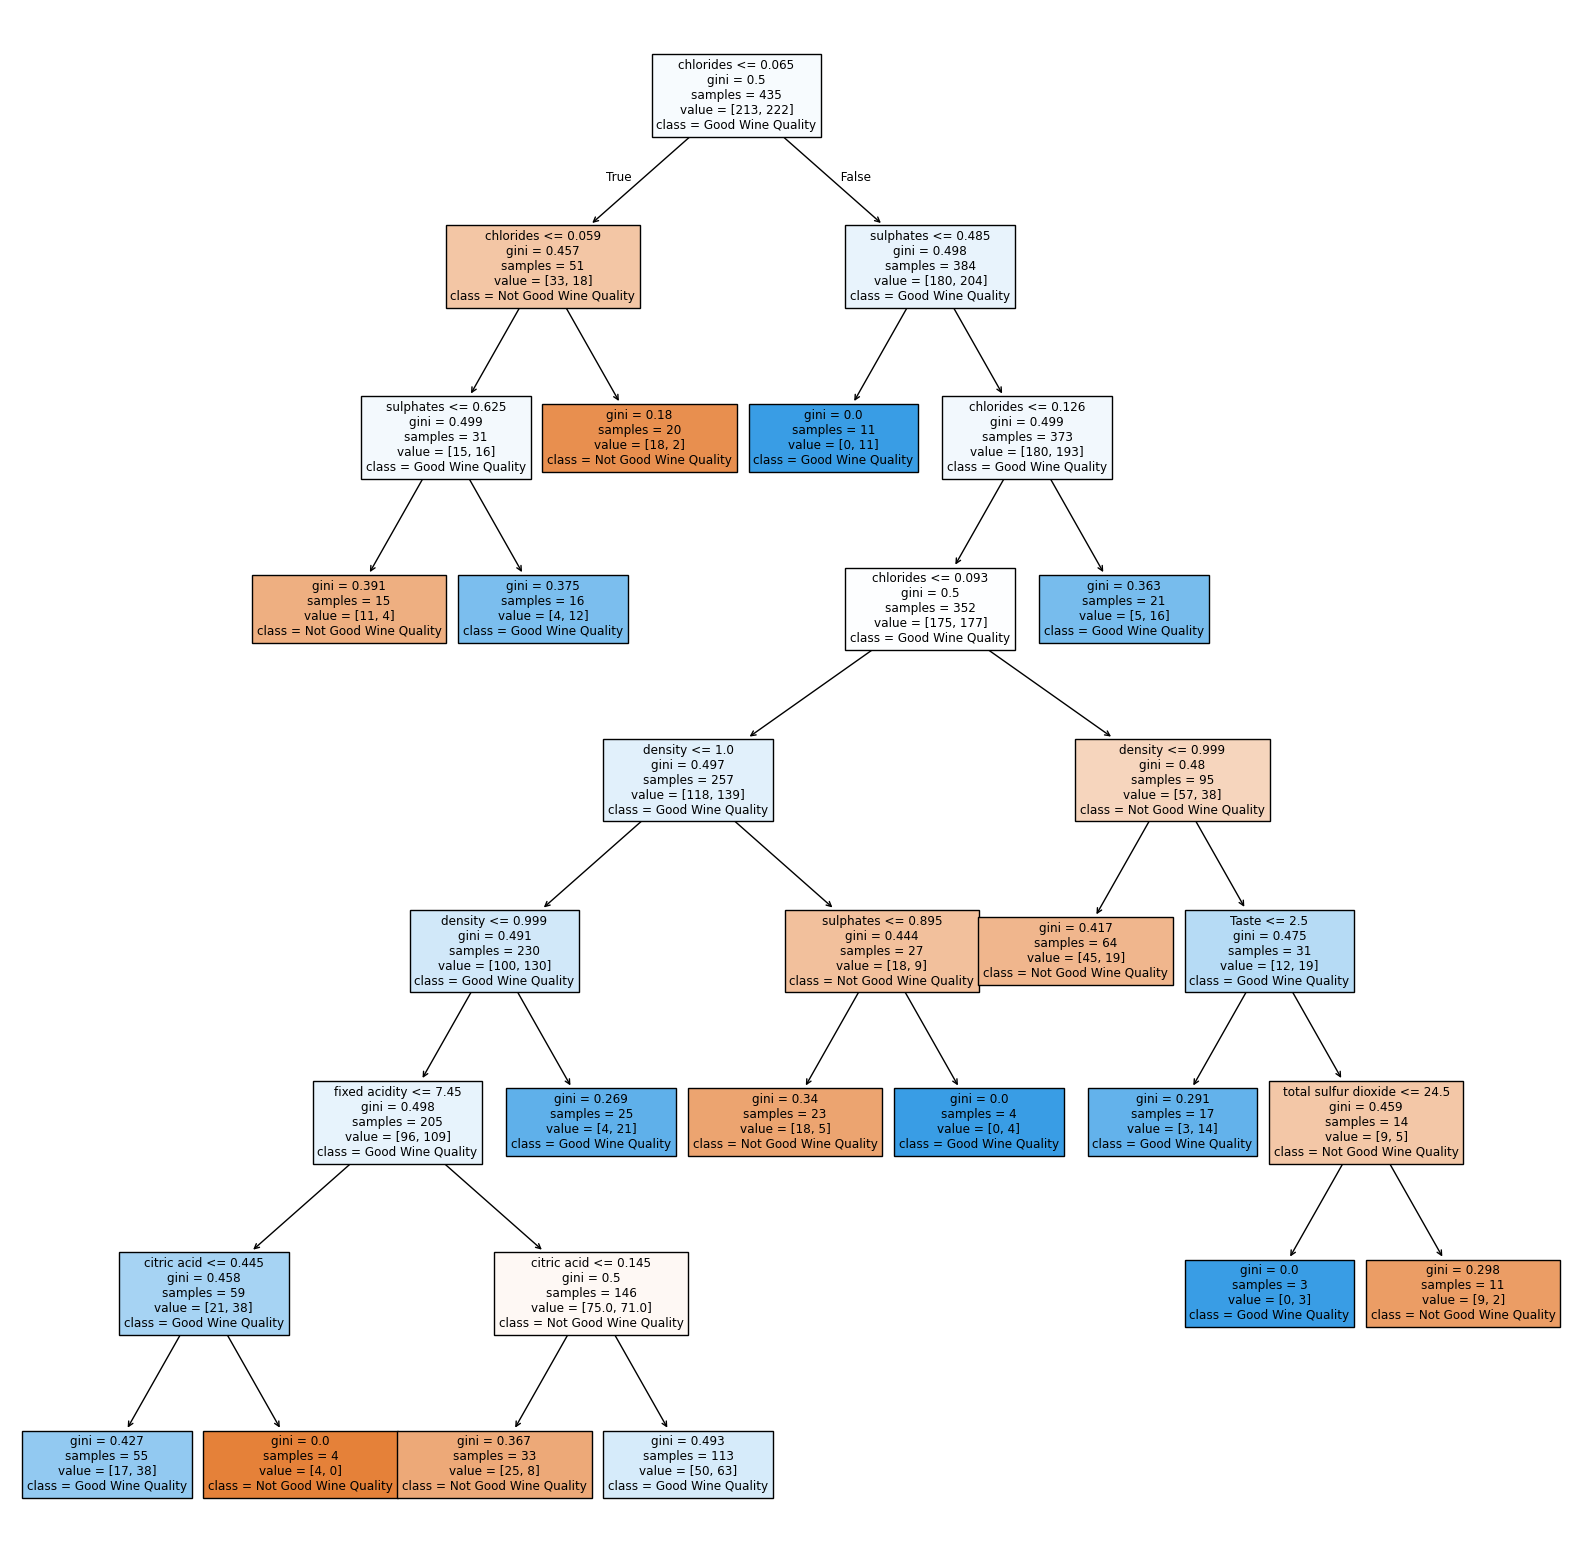

In [43]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not Good Wine Quality', 'Good Wine Quality']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()


## We can see that the size of decision tree significantly got reduced. Also postpruning is much efficient than prepruning.